In [1]:
import pandas as pd # import de pandas
import matplotlib.pyplot as plt

In [2]:
#import des fichier csv dans le repertoire du notebook
population = pd.read_csv('donnee/population.csv')
sous_nutrition = pd.read_csv('donnee/sous_nutrition.csv')
aide_alimentaire = pd.read_csv('donnee/aide_alimentaire.csv')
dispo_alimentaire = pd.read_csv('donnee/dispo_alimentaire.csv')

In [3]:
#verification des types d'objets
population.dtypes 

Zone       object
Année       int64
Valeur    float64
dtype: object

In [4]:
"""objet Année et Valeur de type incorrect attendu: int ou float"""
sous_nutrition.dtypes 

Zone      object
Année     object
Valeur    object
dtype: object

In [5]:
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [6]:
"""pays beneficiaire: je le change en Zone je prefere avoir le même nom de colonne"""
aide_alimentaire= aide_alimentaire.rename(columns={'Pays bénéficiaire':'Zone'})

In [7]:
dispo_alimentaire.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [8]:
#analyse de sous nutrition
"""Année: changé les 201X-201Y en int(210x+1)
Changer la colonne valeur en int, puis regarder les NaN"""
sous_nutrition.head

<bound method NDFrame.head of              Zone      Année Valeur
0     Afghanistan  2012-2014    8.6
1     Afghanistan  2013-2015    8.8
2     Afghanistan  2014-2016    8.9
3     Afghanistan  2015-2017    9.7
4     Afghanistan  2016-2018   10.5
...           ...        ...    ...
1213     Zimbabwe  2013-2015    NaN
1214     Zimbabwe  2014-2016    NaN
1215     Zimbabwe  2015-2017    NaN
1216     Zimbabwe  2016-2018    NaN
1217     Zimbabwe  2017-2019    NaN

[1218 rows x 3 columns]>

In [14]:
""" changement d'année de la colonne Année de sous nutrition
definition d'une fonction pour changer un string en int avec l'opération +1 à a fin
puis appliquation de la fonction sur la colonne avec l'option map"""

def changement_annee(str_annee):
    """retourne xxxx+1 au lieu de 'xxxx-yyyy'"""
    return int(str_annee[0:4])+1

#test fonction
#changement_annee("2012-2014")

sous_nutrition['Année'] = sous_nutrition['Année'].map(changement_annee)
#sous_nutrition.head #verification du map

In [9]:
#nombre de valeur null dans sous nutrition
sous_nutrition.isna().sum()

Zone        0
Année       0
Valeur    594
dtype: int64

In [10]:
#création pour analyser des Nan d'un sous data avec que les Nan
sous_nutritionNan = sous_nutrition[sous_nutrition['Valeur'].isna()]
print(sous_nutritionNan)


           Zone  Année Valeur
24    Allemagne   2013    NaN
25    Allemagne   2014    NaN
26    Allemagne   2015    NaN
27    Allemagne   2016    NaN
28    Allemagne   2017    NaN
...         ...    ...    ...
1213   Zimbabwe   2014    NaN
1214   Zimbabwe   2015    NaN
1215   Zimbabwe   2016    NaN
1216   Zimbabwe   2017    NaN
1217   Zimbabwe   2018    NaN

[594 rows x 3 columns]


In [11]:
"""affichage des pays avec des Nan"""
print(sous_nutritionNan['Zone'].unique())

['Allemagne' 'Andorre' 'Antigua-et-Barbuda' 'Argentine' 'Australie'
 'Autriche' 'Azerbaïdjan' 'Bahamas' 'Bahreïn' 'Bélarus' 'Belgique'
 'Bermudes' 'Bhoutan' 'Bosnie-Herzégovine' 'Brésil' 'Brunéi Darussalam'
 'Burundi' 'Canada' 'Chine - RAS de Hong-Kong' 'Chine, continentale'
 'Comores' 'Croatie' 'Cuba' 'Danemark' 'Djibouti' 'Érythrée' 'Espagne'
 'Estonie' "États-Unis d'Amérique" 'Fédération de Russie' 'Finlande'
 'France' 'Grèce' 'Grenade' 'Groenland' 'Guinée' 'Guinée équatoriale'
 'Guinée-Bissau' 'Hongrie' 'Îles Cook' 'Îles Marshall' 'Irlande' 'Islande'
 'Israël' 'Italie' 'Japon' 'Kazakhstan' 'Koweït' 'Lettonie' 'Libye'
 'Lituanie' 'Luxembourg' 'Maldives' 'Malte'
 'Micronésie (États fédérés de)' 'Monténégro' 'Nauru' 'Niger' 'Nioué'
 'Norvège' 'Nouvelle-Zélande' 'Ouganda' 'Palaos' 'Palestine'
 'Papouasie-Nouvelle-Guinée' 'Pays-Bas' 'Pologne' 'Porto Rico' 'Portugal'
 'Qatar' 'République arabe syrienne' 'République centrafricaine'
 'République de Corée' 'République de Moldova'
 'Républiq

In [12]:
""" en attendant mieux : mettre des 0 à la place des NaN
amelioration possible: filtré par pays:
    pays sans donnée : que faire?
    pays sur avec sousnutrition: mettre la moyenne ? """
sous_nutrition = sous_nutrition.fillna(0.0) #mets des 0 au lieu des Nan


In [16]:
"""valeur pas bien écrite, je doit remplacer 0"""
print (sous_nutrition.loc[(sous_nutrition['Valeur'] == '<0.1')])

         Zone  Année Valeur
60    Arménie   2013   <0.1
61    Arménie   2014   <0.1
62    Arménie   2015   <0.1
63    Arménie   2016   <0.1
64    Arménie   2017   <0.1
...       ...    ...    ...
1183  Vanuatu   2014   <0.1
1184  Vanuatu   2015   <0.1
1185  Vanuatu   2016   <0.1
1186  Vanuatu   2017   <0.1
1187  Vanuatu   2018   <0.1

[120 rows x 3 columns]


In [17]:
"""remplacer les < par 0"""
def remplaceinferieurpar0(valeur):
    """remplace ce qui commence par < par un 0.0"""
    string=str(valeur)
    if string[0]=="<":
        return 0.0
    else:
        return valeur
#test fonction
#remplaceinferieurpar0("<3543543")
#remplaceinferieurpar0("3546387463")

sous_nutrition['Valeur'] = sous_nutrition['Valeur'].map(remplaceinferieurpar0)

In [18]:
"""passer toutes les valeurs en float"""
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].astype(float)

In [19]:
"""verification des types"""
sous_nutrition.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [20]:
"""sousnutrition Valeur en million d'habitant, je prefere en millier pour avoir la même echelle que population.cvs"""
def multi1000(valeur):
    """retourne une valeur multiplier par 1000"""
    return valeur*1000

sous_nutrition['Valeur']= sous_nutrition['Valeur'].map(multi1000)
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2013,8600.0
1,Afghanistan,2014,8800.0
2,Afghanistan,2015,8900.0
3,Afghanistan,2016,9700.0
4,Afghanistan,2017,10500.0


In [21]:
population.isna().sum() #verification des NaN sur population

Zone      0
Année     0
Valeur    0
dtype: int64

In [22]:
aide_alimentaire.isna().sum() #verification des NaN sur aide_alimentaire

Zone       0
Année      0
Produit    0
Valeur     0
dtype: int64

In [23]:
dispo_alimentaire.isna().sum()#verification des NaN sur dispoalimentaire

Zone                                                                 0
Produit                                                              0
Origine                                                              0
Aliments pour animaux                                            12885
Autres Utilisations                                              10109
Disponibilité alimentaire (Kcal/personne/jour)                    1364
Disponibilité alimentaire en quantité (kg/personne/an)            1590
Disponibilité de matière grasse en quantité (g/personne/jour)     3811
Disponibilité de protéines en quantité (g/personne/jour)          4044
Disponibilité intérieure                                           223
Exportations - Quantité                                           3379
Importations - Quantité                                            753
Nourriture                                                        1590
Pertes                                                           11327
Produc

In [21]:
#les Nan dans dispo alimentaire sont des zeros donc on remplis avec des zeros
dispo_alimentaire = dispo_alimentaire.fillna(0) # a voir pour les moyennes 

In [24]:
"""virer les doublons"""
aide_alimentaire = aide_alimentaire.drop_duplicates()
population = population.drop_duplicates()
sous_nutrition = sous_nutrition.drop_duplicates()
dispo_alimentaire = dispo_alimentaire.drop_duplicates()

In [25]:
"""recherche valeur abérante affichage d'un resumé"""
aide_alimentaire.describe()

,Année,Valeur
count,1475.000000,1475.000000
mean,2014.054237,7481.966780
std,0.946916,23339.531424
min,2013.000000,0.000000
25%,2013.000000,287.500000
50%,2014.000000,1178.000000
75%,2015.000000,4334.500000
max,2016.000000,265013.000000


<AxesSubplot:>

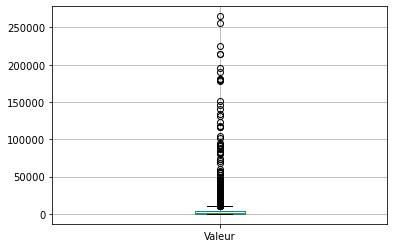

In [26]:
aide_alimentaire.boxplot('Valeur') # debut graphe

<AxesSubplot:xlabel='Valeur', ylabel='Count'>

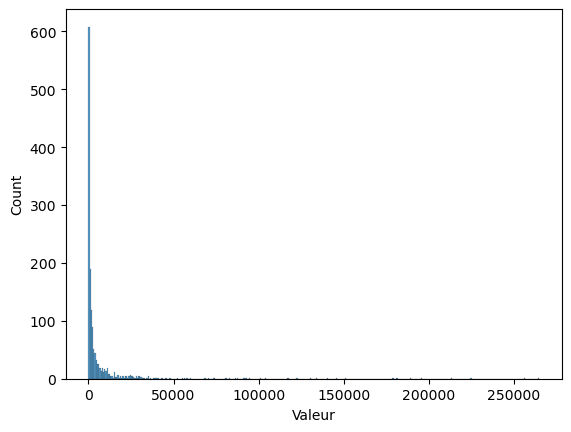

In [27]:
import seaborn as sns
sns.histplot(aide_alimentaire.Valeur)

In [12]:
pip install seaborn

/usr/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
population.describe()

,Année,Valeur
count,1416.000000,1.416000e+03
mean,2015.500000,3.144793e+04
std,1.708428,1.300812e+05
min,2013.000000,7.930000e-01
25%,2014.000000,3.783410e+02
50%,2015.500000,5.126480e+03
75%,2017.000000,1.930666e+04
max,2018.000000,1.427648e+06


In [25]:
dispo_alimentaire.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000
mean,83.578661,55.432426,31.748927,7.830948,0.969754,0.906513,631.143480,86.649023,83.053701,312.480487,29.073887,641.440564,9.912272,141.280807,-6.690292
std,1779.289153,3013.629812,102.961194,23.478909,3.246695,3.143516,9002.563666,933.435208,700.099451,4242.854724,584.672236,9270.864198,194.897843,3992.567621,362.380787
min,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,0.520000,0.020000,0.020000,6.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,18.000000,4.270000,0.310000,0.350000,73.000000,4.000000,16.000000,40.000000,0.000000,42.000000,0.000000,0.000000,0.000000
max,150000.000000,347309.000000,1711.000000,430.760000,60.760000,54.970000,739267.000000,42797.000000,63381.000000,426850.000000,55047.000000,739267.000000,17060.000000,326711.000000,5284.000000


In [26]:
sous_nutrition.describe()

,Année,Valeur
count,1218.000000,1218.000000
mean,2015.500000,2614.778325
std,1.708527,14148.811007
min,2013.000000,0.000000
25%,2014.000000,0.000000
50%,2015.500000,0.000000
75%,2017.000000,1200.000000
max,2018.000000,203800.000000


In [34]:
#jointure diverse pour question. et divers filtrages

#jointure pour fussionner population et sous nutrition (question 1,5)
join_population_sous_nutrition = pd.merge(population,sous_nutrition,on=['Zone','Année'])

#changement des noms de colonnes.
join_population_sous_nutrition.columns = ('Zone','Année','Population','Sous_nutrition')

#jointure pour fussionner la jointure d'avant avec le fichier d'aide alimentaire (question 6)
join_pop_sousnutri_aide = pd.merge(join_population_sous_nutrition,aide_alimentaire,on=['Zone','Année'],how="left")


In [ ]:
#jointure dispo+population en 2017 (question 2,3,4,7)

In [35]:
join_pop_sousnutri_aide.head(60)

,Zone,Année,Population,Sous_nutrition,Produit,Valeur
0,Afghanistan,2013,32269.589,8600.0,Autres non-céréales,682.0
1,Afghanistan,2013,32269.589,8600.0,Blé et Farin,39224.0
2,Afghanistan,2013,32269.589,8600.0,Céréales,40504.0
3,Afghanistan,2013,32269.589,8600.0,"Fruits secs, total",85.0
4,Afghanistan,2013,32269.589,8600.0,Huiles végétales,11087.0
5,Afghanistan,2013,32269.589,8600.0,"Légumineuses Sèches,Tot.",11761.0
6,Afghanistan,2013,32269.589,8600.0,Non-céréales,23615.0
7,Afghanistan,2013,32269.589,8600.0,"Riz, total",1280.0
8,Afghanistan,2014,33370.794,8800.0,Autres non-céréales,335.0
9,Afghanistan,2014,33370.794,8800.0,Blé et Farin,15160.0


In [36]:
#ajout colonne pourcentage Sous Nutrition pour  preparer question 5
join_population_sous_nutrition["PourcentageSN"] = join_population_sous_nutrition["Sous_nutrition"] / join_population_sous_nutrition["Population"]*100

In [37]:
join_population_sous_nutrition.head()

,Zone,Année,Population,Sous_nutrition,PourcentageSN
0,Afghanistan,2013,32269.589,8600.0,26.650479
1,Afghanistan,2014,33370.794,8800.0,26.370364
2,Afghanistan,2015,34413.603,8900.0,25.861866
3,Afghanistan,2016,35383.032,9700.0,27.414270
4,Afghanistan,2017,36296.113,10500.0,28.928718


In [38]:
population.drop(population[population['Année'] != 2017].index)


,Zone,Année,Valeur
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402.484
1396,Viet Nam,2017,94600.648
1402,Yémen,2017,27834.819
1408,Zambie,2017,16853.599


In [6]:
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB
